# Decision Tree

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets. Decision Trees are also the fundamental components of Random forests.

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don't require feature scaling or centering at all.

* **Classification tree** analysis is when the predicted outcome is the class(discrete) to which the data belongs.
* **Regression tree** analysis is when the predicted outcome can be considered a real number.

## Classification Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

%matplotlib inline

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

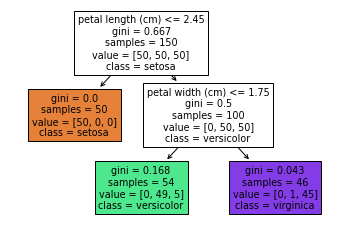

In [2]:
from sklearn import tree

tree.plot_tree(
    tree_clf,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    filled = True
)

Suppose you have found a flower pettals are 5cm long and 1.5cm wide. Decision Tree should output the following probabilities: 0% for iris setosa, 90.7% for iris versicolor, 9.3% for iris virginica. And if you ask it to predict the class, it should output iris versicolor(class 1) because it has the highest probability.

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression Tree

In [5]:
import numpy as np

m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1)/10

In [6]:
X.shape, y.shape

((200, 1), (200, 1))

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(167.4, 181.2, 'x1 <= 0.145\nmse = 0.09\nsamples = 200\nvalue = 0.337'),
 Text(83.7, 108.72, 'x1 <= 0.065\nmse = 0.026\nsamples = 30\nvalue = 0.787'),
 Text(41.85, 36.23999999999998, 'mse = 0.012\nsamples = 17\nvalue = 0.888'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.014\nsamples = 13\nvalue = 0.655'),
 Text(251.10000000000002, 108.72, 'x1 <= 0.803\nmse = 0.06\nsamples = 170\nvalue = 0.258'),
 Text(209.25, 36.23999999999998, 'mse = 0.026\nsamples = 136\nvalue = 0.171'),
 Text(292.95, 36.23999999999998, 'mse = 0.045\nsamples = 34\nvalue = 0.604')]

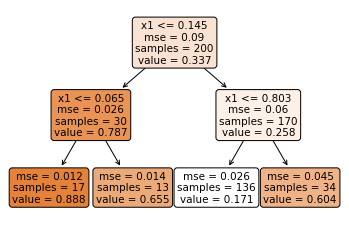

In [8]:
tree.plot_tree(
    tree_reg,
    feature_names = ["x1"],
    rounded = True,
    filled = True
)

## The CART alogrithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees (also called "growing" trees). The algorithm works by first splitting the training set into two subnets using a single feature $k$ and a threshold $t_k$.

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic., then sub-subnets, and so on, recursively. It stop recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum aplit at the top level, then repeats the process at each subsequent level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a solution that's reasonably good but not guaranteed to be optimal.

**Regression:**

Regression tree looks very similar to the classification tree, except that instead of trying to split the training set in a way that minimize impurity, it now tries to split the training set in a way that minimizes the MSE. The main difference in that instead of predicting a class in each node, it predicts a value. Notice how the predicted value of for each region is always the average target value of the instances in that region. Just like for classification tacks, Decision Trees are prone to overfitting when dealing with regression tacks.

## Gini impurity or Entropy ?

* **Entropy** can be defined as a measure of the purity of the sub split. Entropy always lies between 0 to 1. 
* **Gini Impurity** The internal working of gini impurity is also somewhat similar to the working of entropy in the Decision Tree. In the Decision Tree algorithm, both are used for building the tree by splitting as per the appropriate features but there is quite a difference in the computation of both the methods.

So, should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy leads to produce slightly more balanced trees.

## Regularization Hyperparameters

Decision Trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely - indeed, most likely overfitting it. To avoid overfitting the training data, you need to restrict the Decision tree's freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict **max_depth** hyperparameter (default value is None, which means unlimited). Reducing **max_depth** will regularize the model and thus reduce the risk of overfitting.